# Advanced Data Visualisation on Python

In [100]:
#Advanced Data Visualisation 
from PIL import Image #Converting images to arrays
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [101]:
import matplotlib.patches as mpatches #needed for waffle charts
mpl.style.use('ggplot') #optional: for ggplot-like style

In [102]:
df_can = pd.read_excel('Canada_Modified.xlsx', 
sheet_name = "Sheet1",
engine = "openpyxl")

In [103]:
df_can.head(5)

,Unnamed: 0,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
2,Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
3,New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
4,San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5


In [104]:
df_can.rename(columns={'Unnamed: 0': 'Country'}, inplace=True)
df_can.set_index('Country', inplace=True)

In [105]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5


In [106]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [107]:
#Compute the proportion of each category w.r.t the total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value)/total_values) for value in df_dsn['Total']]

#print out proportions
for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i]+ ' : ' + str(proportion))

Denmark : 0.32255663965602777
Norway : 0.1924094592359848
Sweden : 0.48503390110798744


In [108]:
width = 40
height = 10
total_num_tiles = width*height

print('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [109]:
#compute tiles for each category
tiles_per_category = [round(proportion*total_num_tiles) for proportion in category_proportions]

#print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i]+ " : "+str(tiles))

Denmark : 129
Norway : 77
Sweden : 194


In [110]:
#waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

#indices to loop through waffle chart
category_index = 0
tile_index = 0

#populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index +=1

        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1

        waffle_chart[row, col] = category_index
    
print('Waffle chart populated')

Waffle chart populated


In [111]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 640x480 with 0 Axes>

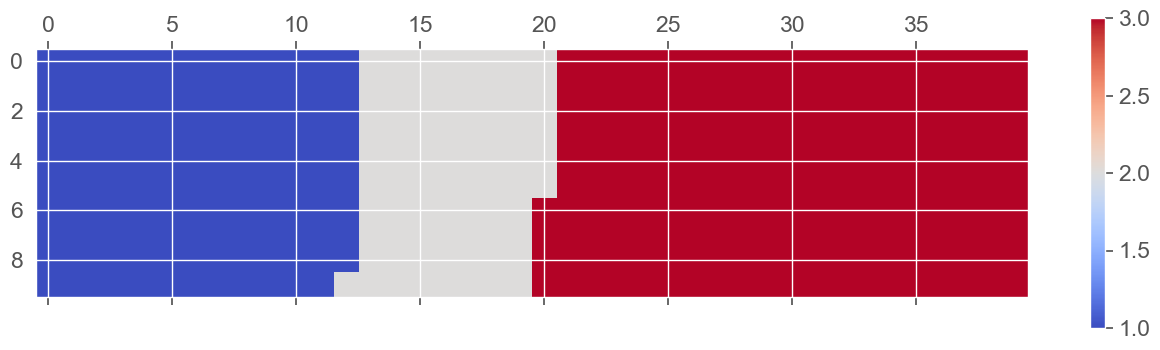

In [112]:
#mapping waffle chart into a visual

fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 640x480 with 0 Axes>

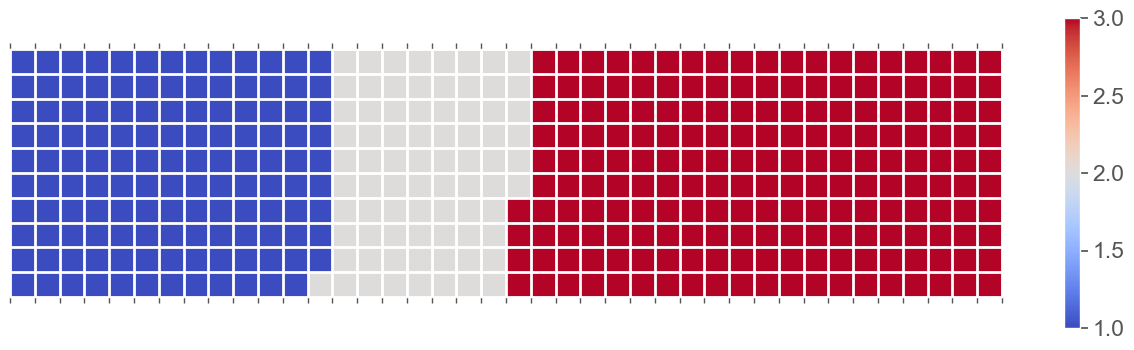

In [113]:
#Prettify the chart 
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width),1), minor=True)
ax.set_yticks(np.arange(-.5, (height),1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 640x480 with 0 Axes>

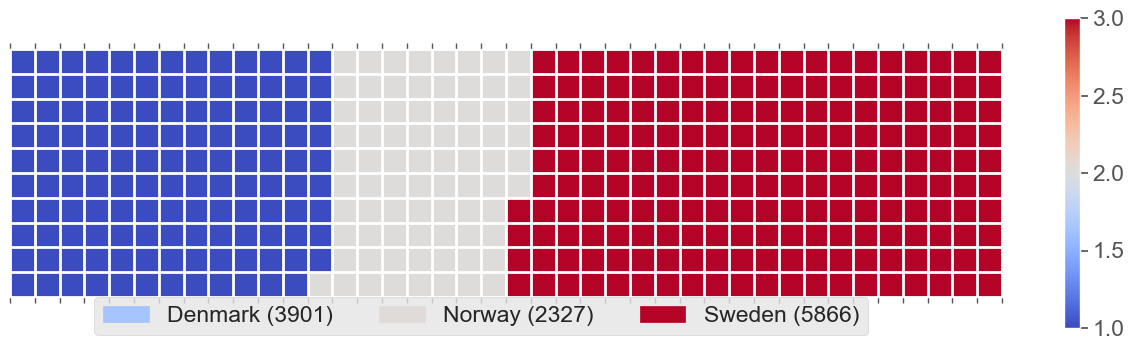

In [114]:
#Prettify the chart 
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width),1), minor=True)
ax.set_yticks(np.arange(-.5, (height),1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

#Create legend

values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum)-1]

legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' ('+str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

plt.legend(handles= legend_handles,
            loc = 'lower center',
            ncol = len(df_dsn.index.values),
            bbox_to_anchor = (0., -0.2, 0.95, 0.1)
            )

In [115]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):
    #Compute the proportion of each category w.r.t the total
    total_values = sum(values)
    category_proportions = [(float(value)/total_values) for value in values]

    
    total_num_tiles = width*height 
    print('Total number of tiles is ', total_num_tiles)

    #compute tiles for each category
    tiles_per_category = [round(proportion*total_num_tiles) for proportion in category_proportions]

    #print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print(df_dsn.index.values[i]+ " : "+str(tiles))

    #waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    #indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    #populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index +=1

            if tile_index > sum(tiles_per_category[0:category_index]):
                category_index += 1

            waffle_chart[row, col] = category_index

    fig = plt.figure()
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    ax = plt.gca()

    ax.set_xticks(np.arange(-.5, (width),1), minor=True)
    ax.set_yticks(np.arange(-.5, (height),1), minor=True)

    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum)-1]

    legend_handles = []
    for i, category in enumerate(df_dsn.index.values):
        label_str = category + ' ('+str(values[i]) + ')'
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    plt.legend(handles= legend_handles,
                loc = 'lower center',
                ncol = len(df_dsn.index.values),
                bbox_to_anchor = (0., -0.2, 0.95, 0.1)
                )

Total number of tiles is  400
Denmark : 129
Norway : 77
Sweden : 194


<Figure size 640x480 with 0 Axes>

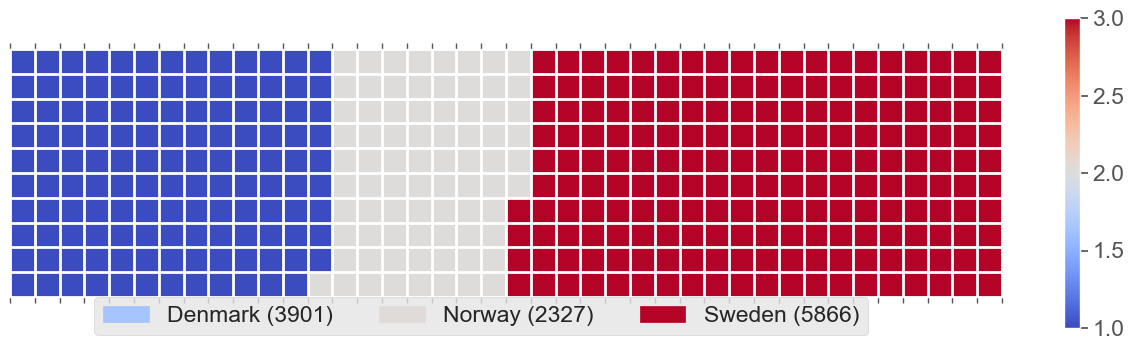

In [116]:
create_waffle_chart(df_dsn.index.values, df_dsn['Total'], 10, 40, plt.cm.coolwarm)

## Creating word cloud

In [117]:
import sys
print(sys.executable)

/Users/u2170476/opt/anaconda3/bin/python


In [118]:
#import necessary libraries
from wordcloud import WordCloud, STOPWORDS
import PyPDF4

In [119]:
# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

File downloaded and saved!


In [120]:
stopwords = set(STOPWORDS)

In [121]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

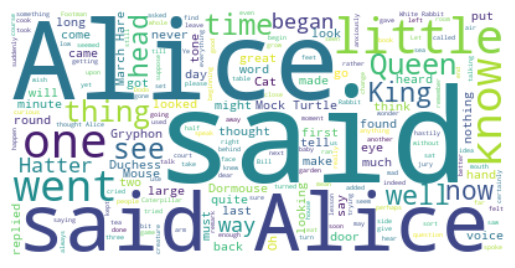

In [122]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

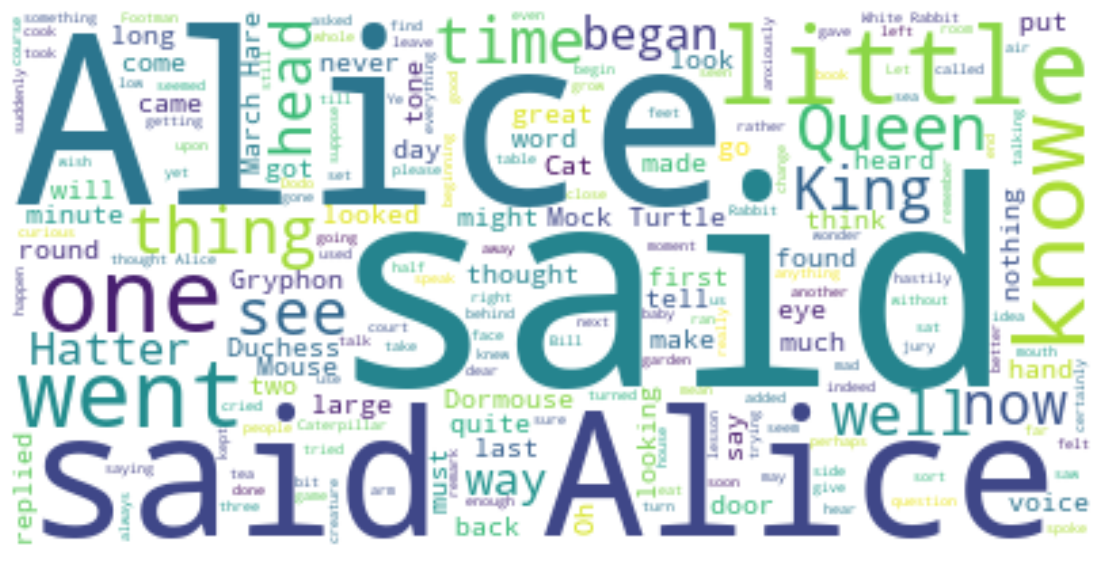

In [123]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

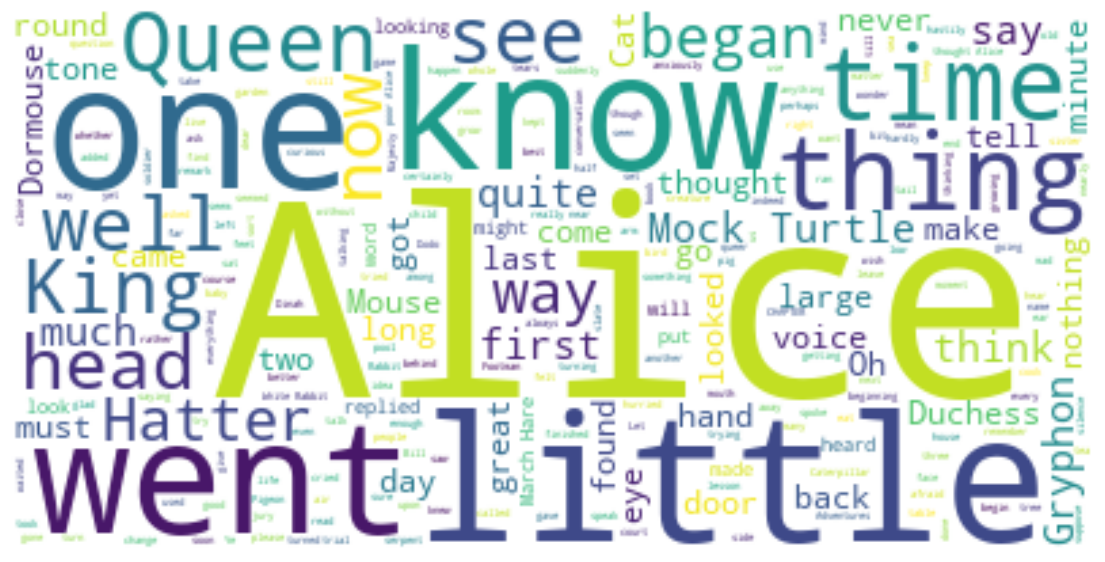

In [124]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [125]:
# save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


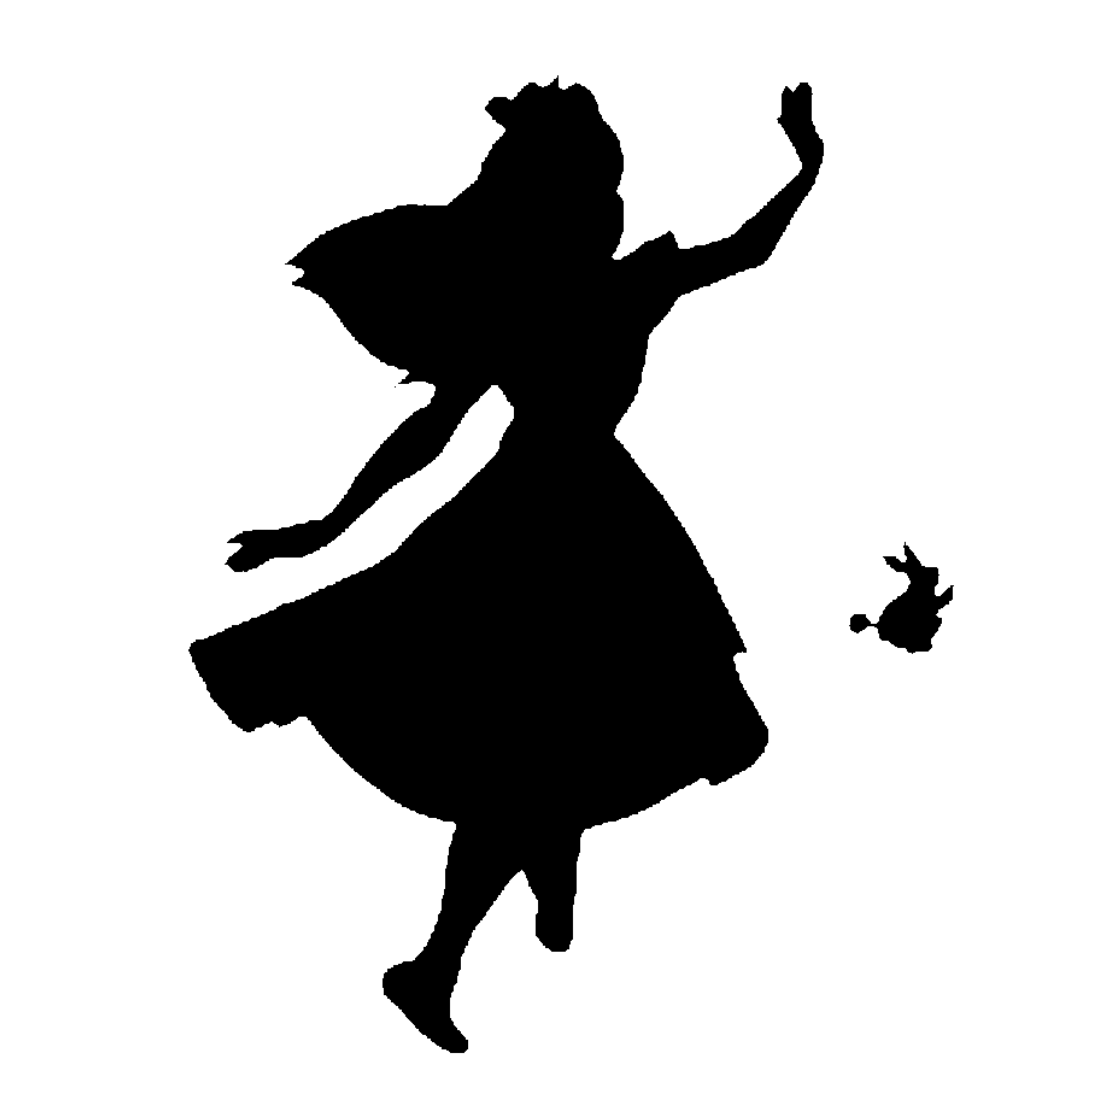

In [126]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

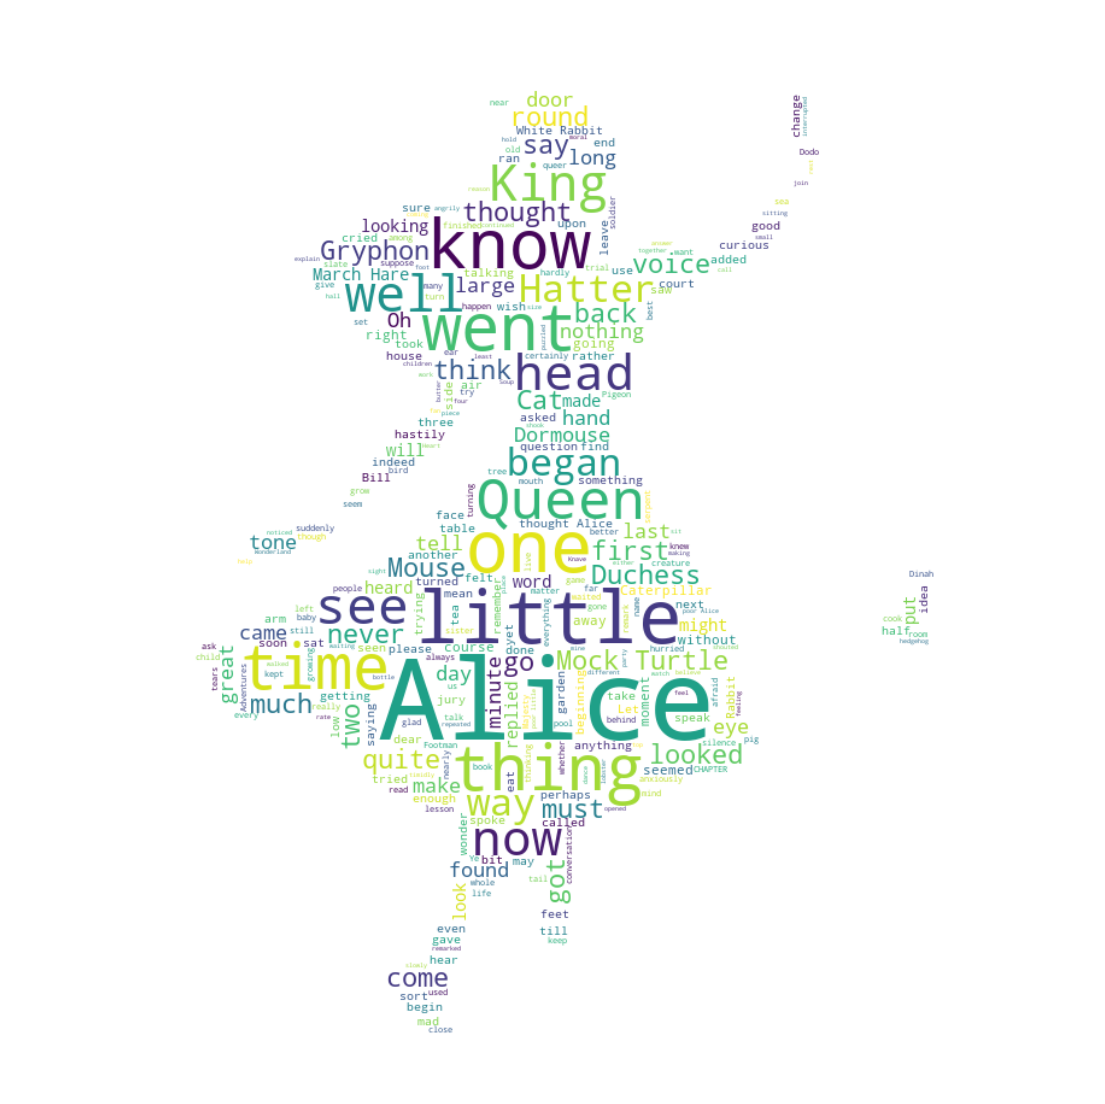

In [127]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Seaborn Library

In [128]:
import seaborn as sns
print('Seaborn is installed and imported!')

Seaborn is installed and imported!


In [129]:
#Redefine years
years = list(
    map(str, range(1980, 2014))
)
years
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,143137
1,1981.0,128641
2,1982.0,121175
3,1983.0,89185
4,1984.0,88272


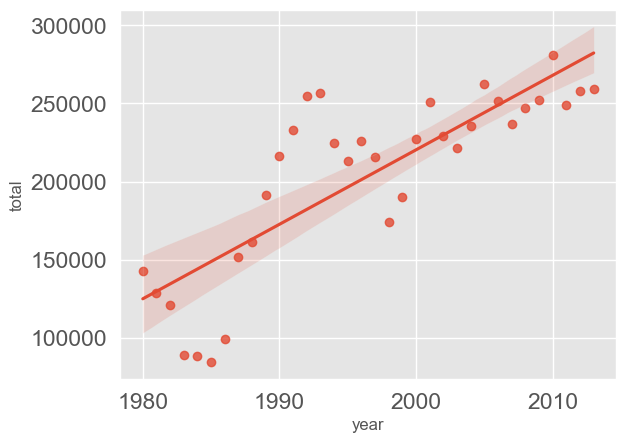

In [130]:
ax = sns.regplot(
    x = 'year',
    y = 'total',
    data = df_tot
)

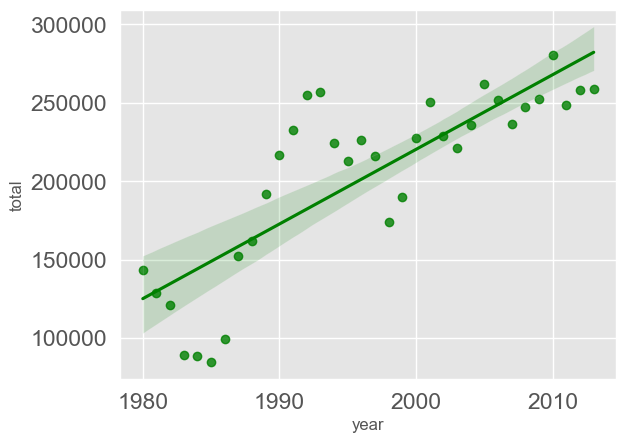

In [131]:
ax = sns.regplot(
    x = 'year',
    y = 'total',
    data = df_tot,
    color ='green'
)

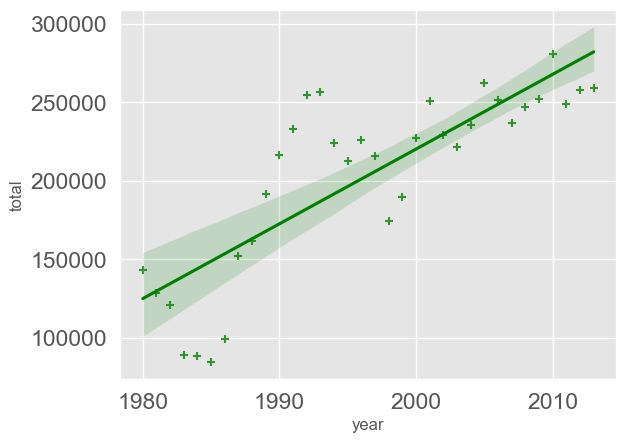

In [132]:
ax = sns.regplot(
    x = 'year',
    y = 'total',
    data = df_tot,
    color ='green',
    marker = '+'
)

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

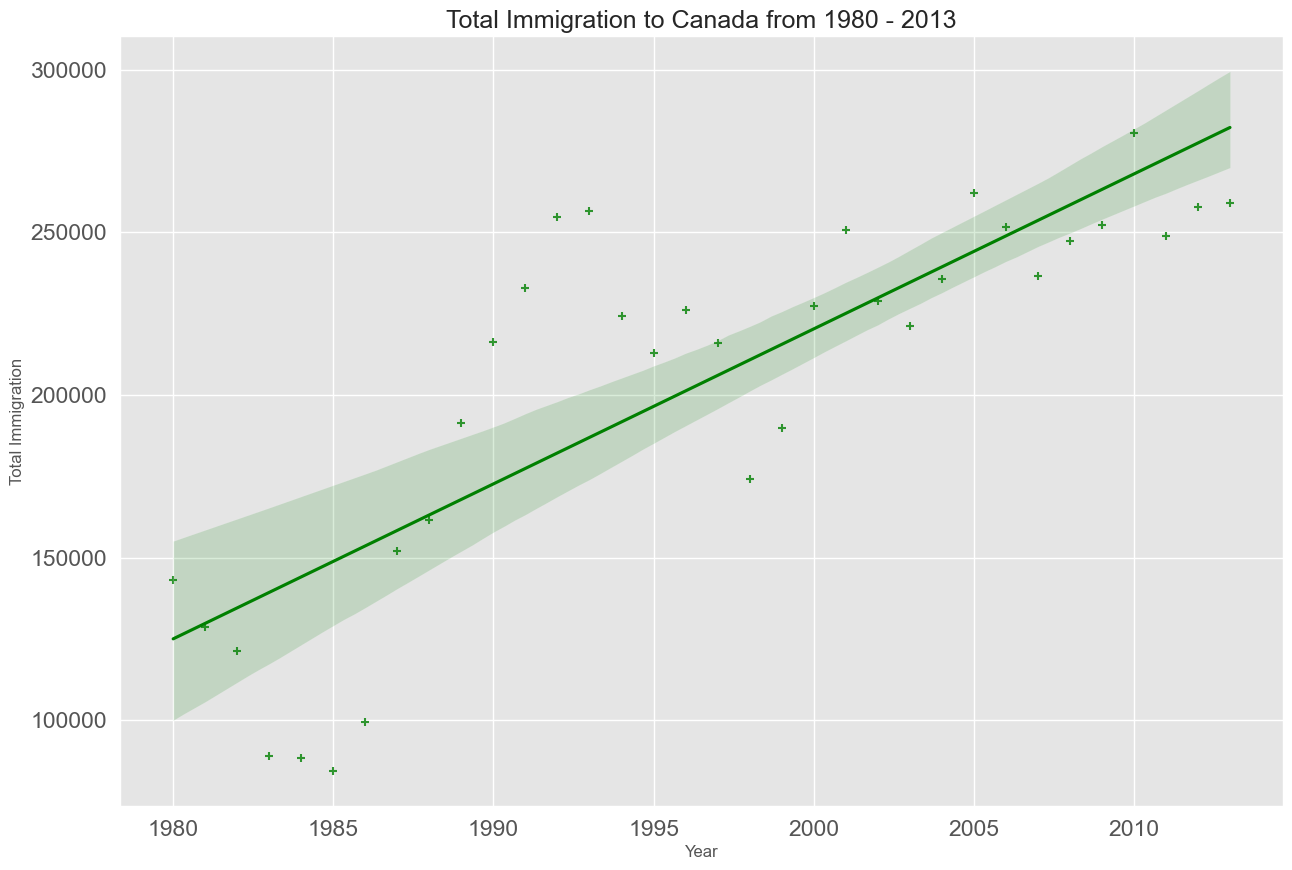

In [133]:
plt.figure(figsize=(15,10))
ax = sns.regplot(
    x = 'year',
    y = 'total',
    data = df_tot,
    color ='green',
    marker = '+'
)
sns.set(font_scale=1.5)
ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Text(0.5, 1.0, 'Total Immigration from Denmark, Sweden and Norway to Canada from 1980 - 2013')

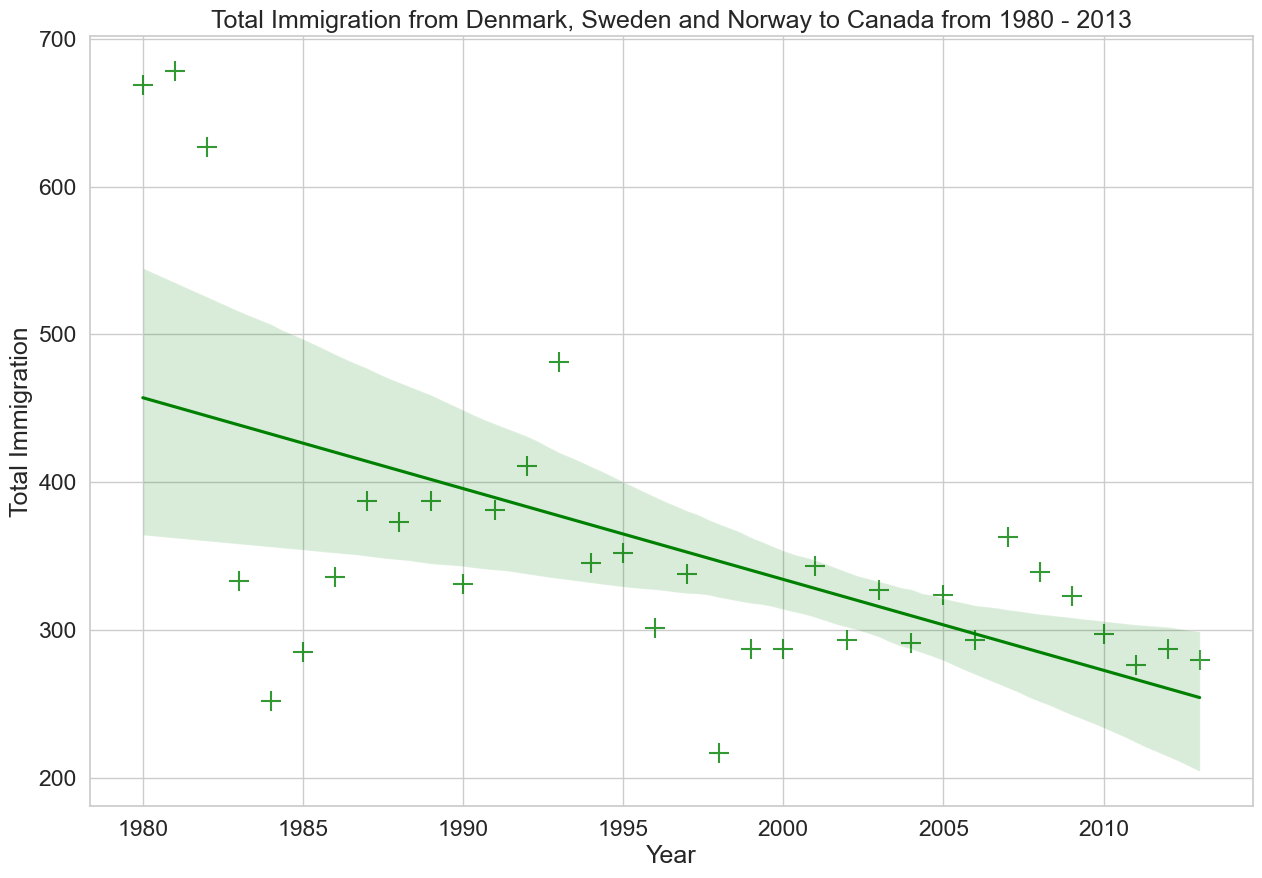

In [134]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)

df_total.columns = ['year','total']
df_total['year']=df_total['year'].astype(int)

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Sweden and Norway to Canada from 1980 - 2013')

## Folium Library

In [135]:
#import necessary libaries
import folium

In [136]:
world_map = folium.Map()
world_map

In [137]:
# define the world map centered around Canada with a higher zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=3)

# display world map
world_map

In [138]:
#define Mexico's geolocation coordinates
mexico_latitude = 23.6345 
mexico_longitude = -102.5528

# define the world map centered around Canada with a higher zoom level
mexico_map = folium.Map(location=[mexico_latitude, mexico_longitude], zoom_start=4)

# display world map
mexico_map

In [139]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4)

# display map
world_map

In [140]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4)

# display map
world_map

In [141]:
df_incidents = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [142]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [143]:
df_incidents.shape

(150500, 13)

In [144]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [145]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [146]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

In [147]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

In [148]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

In [149]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

In [150]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map